# <b><u>Exploratory Data Analysis for my expenses using Python.</u></b>
###                                              -Aadit Kapoor
## We use the dataset in the form of csv from the <b>ThomasCook Website</b> to get my expenditure for 1 year.
## Our aim is to discover:
- Trends
- The way I spend money
- Prediction of the amount I may spend on a particular day.

In [615]:
# importing
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import seaborn as sns
import datetime

pd.options.mode.chained_assignment = None

## <u>Overview of the dataset</u>
- Let us first start by viewing our data and gathering some straight up facts from it.

In [616]:
# loading data
data = pd.read_csv("expenses.csv", parse_dates=["st_date","t_date"])
data.sort_values(by=["t_date", "st_date"], inplace=True) # Give the sorted data
data_copy = data.copy()
data.head(10)

,st_date,t_date,ref_num,tran_details,t_amount,curr,s_amt,curr_2,fee_amt,fee_gst,cross_charges,gst_cross,total_amt,D_C
44,2018-08-18,2018-08-16,26025468,MEMO CASH ADVANCE BANK OF AMERICA CA0158 SAN J...,100.00,USD,0,USD,1.75,0.32,0,0,102.07,Dr
43,2018-08-19,2018-08-16,26021120,DEBIT PURCHASE CHE PANDA EXPR SAN JOSE CA,13.98,USD,0,USD,0.00,0.00,0,0,13.98,Dr
42,2018-10-16,2018-10-14,31840420,DEBIT PURCHASE PAMF 685 COLEMAN MF SAN JOSE CA,79.00,USD,0,USD,0.00,0.00,0,0,79.00,Dr
40,2018-12-20,2018-12-18,37923858,DEBIT PURCHASE THE CHOCOLATE MARKET SAN FRANCI...,4.88,USD,0,USD,0.00,0.00,0,0,4.88,Dr
41,2018-12-20,2018-12-18,37923361,DEBIT PURCHASE THE CHOCOLATE MARKET SAN FRANCI...,9.77,USD,0,USD,0.00,0.00,0,0,9.77,Dr
38,2018-12-21,2018-12-18,37923660,DEBIT PURCHASE NEW STAND AREA G SAN FRANCISCO CA,2.99,USD,0,USD,0.00,0.00,0,0,2.99,Dr
39,2018-12-21,2018-12-18,37921147,DEBIT PURCHASE KOI PALACE EXPRESS SAN FRANCISC...,14.41,USD,0,USD,0.00,0.00,0,0,14.41,Dr
20,2019-04-04,2019-01-04,46833172,DEBIT PURCHASE 7-ELEVEN 14288 SAN JOSE CA,7.51,USD,0,USD,0.00,0.00,0,0,7.51,Dr
36,2019-01-23,2019-01-21,40358666,ECOM DEBIT Completion UBR* PENDING.UBER.COM SA...,76.47,USD,0,USD,0.00,0.00,0,0,76.47,Dr
37,2019-01-23,2019-01-21,40358393,ECOM DEBIT Completion UBR* PENDING.UBER.COM SA...,76.47,USD,0,USD,0.00,0.00,0,0,5.00,Dr


In [619]:
# resetting index
print ("Length: ", len(data))
print ("Number of columns: ", len(data.columns))
print 
print ("Range of the data is from: ", data.t_date.min(), "to this: ", data.t_date.max())
print ("The maximum amount in the account is: ", "$",data.total_amt.max())
print ("Mode: ", data.total_amt.mode())
print ("Median: ", data.total_amt.median())
print ("Mean: ", data.total_amt.mean())

print ("Minimum amount in the account is: $", data.total_amt.min())
print()
print ("The first transaction to the account was: $", data.t_amount.values[0], "at: ", data["tran_details"][data["t_amount"] == data["t_amount"].values[0]])

Length:  45
Number of columns:  14
Range of the data is from:  2018-08-16 00:00:00 to this:  2019-11-02 00:00:00
The maximum amount in the account is:  $ 1000.0
Mode:  0    0.79
1    7.51
dtype: float64
Median:  12.02
Mean:  57.28288888888888
Minimum amount in the account is: $ 0.79

The first transaction to the account was: $ 100.0 at:  44    MEMO CASH ADVANCE BANK OF AMERICA CA0158 SAN J...
Name: tran_details, dtype: object


- Looking at the data we find that there are 45 rows (entries) and there are 14 columns. The data ranges from the period of August 2018 to August 2019.
- 
#### A brief overview of the features are as follows:
- st_date: Settlement date
- t_date: Transaction date
- ref_num: Reference Number
- tran_details: Transaction details
- t_amount: transaction amount
- curr: Currency
- s_amt: Settlement amount
- curr_2: Currency
- fee_amt: Fee amount
- fee_gst: Fee GST
- cross_charges: Cross currency charges
- gst_cross: GST Cross
- total_amt: Total amount
- D_C: Debit or Credit

## <u>Data Preprocessing</u>
- Looking at the data, we eliminate a certain number of columns and then proceed with our investigation.

In [620]:
# data preprocessing functions

days = {"Monday":0, "Tuesday":1, "Wednesday":2, "Thursday":3, "Friday":4, "Saturday":5, "Sunday":6}

# convert date to day of the week
def convert_date_to_week(date):
    year, month, day = (int(x) for x in date.split('/'))   
    ans = datetime.date(year, month, day)
    return ans.strftime("%A")

In [621]:
data.set_index(data_copy.tran_details, inplace=True)

# removing the highest amount as it was deposited.
data.drop("Card Reload F0566I19SDD22005", inplace=True, axis=0)
data.drop("Card Reload F0566I19SCX88728", inplace=True, axis=0)

# resetting index
data.head()

,st_date,t_date,ref_num,tran_details,t_amount,curr,s_amt,curr_2,fee_amt,fee_gst,cross_charges,gst_cross,total_amt,D_C
tran_details,,,,,,,,,,,,,,
MEMO CASH ADVANCE BANK OF AMERICA CA0158 SAN JOSE CA,2018-08-18,2018-08-16,26025468,MEMO CASH ADVANCE BANK OF AMERICA CA0158 SAN J...,100.00,USD,0,USD,1.75,0.32,0,0,102.07,Dr
DEBIT PURCHASE CHE PANDA EXPR SAN JOSE CA,2018-08-19,2018-08-16,26021120,DEBIT PURCHASE CHE PANDA EXPR SAN JOSE CA,13.98,USD,0,USD,0.00,0.00,0,0,13.98,Dr
DEBIT PURCHASE PAMF 685 COLEMAN MF SAN JOSE CA,2018-10-16,2018-10-14,31840420,DEBIT PURCHASE PAMF 685 COLEMAN MF SAN JOSE CA,79.00,USD,0,USD,0.00,0.00,0,0,79.00,Dr
DEBIT PURCHASE THE CHOCOLATE MARKET SAN FRANCISCO CA,2018-12-20,2018-12-18,37923858,DEBIT PURCHASE THE CHOCOLATE MARKET SAN FRANCI...,4.88,USD,0,USD,0.00,0.00,0,0,4.88,Dr
DEBIT PURCHASE THE CHOCOLATE MARKET SAN FRANCISCO CA,2018-12-20,2018-12-18,37923361,DEBIT PURCHASE THE CHOCOLATE MARKET SAN FRANCI...,9.77,USD,0,USD,0.00,0.00,0,0,9.77,Dr


In [622]:
# Reset the index
data.reset_index(drop=True, inplace=True)

In [623]:
# removing settlement date, reference number, curr, s_amt, curr_2, fee_amt, fee_gst, cross_charges, gst_cross, d_c
data.drop(columns=["st_date", "ref_num","total_amt","curr","s_amt","curr_2", "fee_amt", "fee_gst", "cross_charges", "gst_cross", "D_C"], axis=1,inplace=True)
data.head()


,t_date,tran_details,t_amount
0,2018-08-16,MEMO CASH ADVANCE BANK OF AMERICA CA0158 SAN J...,100.00
1,2018-08-16,DEBIT PURCHASE CHE PANDA EXPR SAN JOSE CA,13.98
2,2018-10-14,DEBIT PURCHASE PAMF 685 COLEMAN MF SAN JOSE CA,79.00
3,2018-12-18,DEBIT PURCHASE THE CHOCOLATE MARKET SAN FRANCI...,4.88
4,2018-12-18,DEBIT PURCHASE THE CHOCOLATE MARKET SAN FRANCI...,9.77


### We removed all the unrequired columns as follows:
- st_date: We do not care about the settlement date
- ref_num: Reference number is no use to us
- curr: We already know the currency (Everything is in $)
- s_amt: Settlement amount
- fee_amt: this amount is negligible
- D_c: no use to the user

In [624]:
threshold = 10.0 # For a student, spending more than or equal to $10 is considered expensive (can be changed)
data["is_place_duplicated"] = data["tran_details"].duplicated()

- Now we aim to set a new column to tackle the tran_details column and make it useful. We aim to apply feature engineering to set all the places where I have spent above the threshold 1 and the other places as 0.

In [625]:
"""
    return all the duplicated places.
"""
def get_duplicated_places(data, key="is_place_duplicated"):
    places = []
    for place, t_f in zip(data["tran_details"],data[key]):
        if t_f:
            places.append(place)
        else:
            pass
    return places

# get the count for each place.
def get_count():
    places = {"place":[], "count":[]}
    for place, count in zip(data.tran_details.value_counts().keys(), data.tran_details.value_counts().values):
        places["place"].append(place)
        places["count"].append(count)
    return places


In [626]:
for place in  (get_duplicated_places(data)):
    print (place)

DEBIT PURCHASE THE CHOCOLATE MARKET SAN FRANCISCO CA
ECOM DEBIT Completion UBR* PENDING.UBER.COM SAN FRANCISCO CA
ECOM DEBIT Completion AMZN Pickup Amzn.com/bill WA
DEBIT PURCHASE 7-ELEVEN 14288 SAN JOSE CA
DEBIT PURCHASE 7-ELEVEN 14288 SAN JOSE CA
ECOM DEBIT Completion AMZN Mktp US Amzn.com/bill WA
DEBIT PURCHASE 7-ELEVEN 14288 SAN JOSE CA
DEBIT PURCHASE 7-ELEVEN 95113 SAN JOSE CA
DEBIT PURCHASE 7-ELEVEN 95113 SAN JOSE CA
DEBIT PURCHASE 7-ELEVEN 14288 SAN JOSE CA
MEMO CASH ADVANCE BANK OF AMERICA CA0158 SAN JOSE CA
DEBIT PURCHASE H20 WIRELESS FORT LEE NJ
DEBIT PURCHASE THE CHOCOLATE MARKET SAN FRANCISCO CA
ECOM DEBIT Completion Lyft *Pending SAN FRANCISCO CA
DEBIT PURCHASE THE MARKET (SAFEWAY) San Jose CA


- All the duplicated places where I have spent money.

In [627]:
data.head()

,t_date,tran_details,t_amount,is_place_duplicated
0,2018-08-16,MEMO CASH ADVANCE BANK OF AMERICA CA0158 SAN J...,100.00,False
1,2018-08-16,DEBIT PURCHASE CHE PANDA EXPR SAN JOSE CA,13.98,False
2,2018-10-14,DEBIT PURCHASE PAMF 685 COLEMAN MF SAN JOSE CA,79.00,False
3,2018-12-18,DEBIT PURCHASE THE CHOCOLATE MARKET SAN FRANCI...,4.88,False
4,2018-12-18,DEBIT PURCHASE THE CHOCOLATE MARKET SAN FRANCI...,9.77,True


In [638]:
print ("Max duplicated place: ", data.tran_details.value_counts().max(), (get_count()["place"][0]))

Max duplicated place:  5 DEBIT PURCHASE 7-ELEVEN 14288 SAN JOSE CA


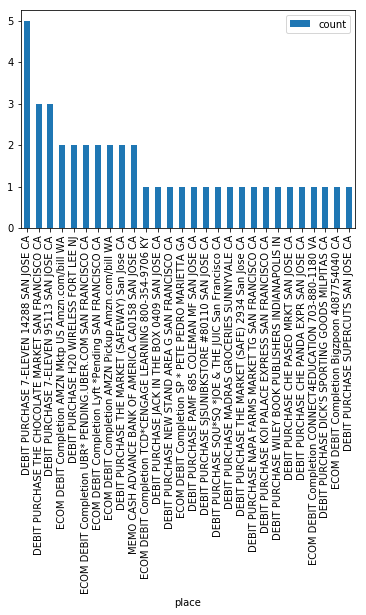

In [634]:
pd.DataFrame(get_count()).plot.bar(x="place",y="count")

- We can see a distribution of the money spent in these places.

In [639]:
# Total money spent at each place.
# We removed these two keys as these were the money reloaded texts.
data.groupby("tran_details")["t_amount"].sum()

tran_details
DEBIT PURCHASE 7-ELEVEN 14288 SAN JOSE CA                        30.67
DEBIT PURCHASE 7-ELEVEN 95113 SAN JOSE CA                         8.14
DEBIT PURCHASE CHE PANDA EXPR SAN JOSE CA                        13.98
DEBIT PURCHASE CHE PASEO MRKT SAN JOSE CA                         1.93
DEBIT PURCHASE DICK'S SPORTING GOODS MILPITAS CA                 49.03
DEBIT PURCHASE H20 WIRELESS FORT LEE NJ                          30.00
DEBIT PURCHASE JACK IN THE BOX 0409 SAN JOSE CA                   6.87
DEBIT PURCHASE KOI PALACE EXPRESS SAN FRANCISCO CA               14.41
DEBIT PURCHASE MADRAS GROCERIES SUNNYVALE CA                      7.98
DEBIT PURCHASE NAPA FARMS MARKET TG SAN FRANCISCO CA              3.27
DEBIT PURCHASE NEW STAND AREA G SAN FRANCISCO CA                  2.99
DEBIT PURCHASE PAMF 685 COLEMAN MF SAN JOSE CA                   79.00
DEBIT PURCHASE SJSUNIBKSTORE #80110 SAN JOSE CA                 110.72
DEBIT PURCHASE SQU*SQ *JOE & THE JUIC San Francisco CA          

In [645]:
# the max money spent
print ("Max money spent: ", data.groupby("tran_details")["t_amount"].sum().max())
data.groupby("tran_details")["t_amount"].sum()

Max money spent:  300.0


tran_details
DEBIT PURCHASE 7-ELEVEN 14288 SAN JOSE CA                        30.67
DEBIT PURCHASE 7-ELEVEN 95113 SAN JOSE CA                         8.14
DEBIT PURCHASE CHE PANDA EXPR SAN JOSE CA                        13.98
DEBIT PURCHASE CHE PASEO MRKT SAN JOSE CA                         1.93
DEBIT PURCHASE DICK'S SPORTING GOODS MILPITAS CA                 49.03
DEBIT PURCHASE H20 WIRELESS FORT LEE NJ                          30.00
DEBIT PURCHASE JACK IN THE BOX 0409 SAN JOSE CA                   6.87
DEBIT PURCHASE KOI PALACE EXPRESS SAN FRANCISCO CA               14.41
DEBIT PURCHASE MADRAS GROCERIES SUNNYVALE CA                      7.98
DEBIT PURCHASE NAPA FARMS MARKET TG SAN FRANCISCO CA              3.27
DEBIT PURCHASE NEW STAND AREA G SAN FRANCISCO CA                  2.99
DEBIT PURCHASE PAMF 685 COLEMAN MF SAN JOSE CA                   79.00
DEBIT PURCHASE SJSUNIBKSTORE #80110 SAN JOSE CA                 110.72
DEBIT PURCHASE SQU*SQ *JOE & THE JUIC San Francisco CA          

In [646]:
print ("Min money spent: ", data.groupby("tran_details")["t_amount"].sum().min())

Min money spent:  1.93


In [647]:
print ("Mean money spent: ", data.groupby("tran_details")["t_amount"].sum().mean())

Mean money spent:  47.964285714285715


- Here we can see the max, min and the mean spent on these places.

In [648]:
# create a new column (perform feature engineering)
def create_new_column():
    
    # replacing values of tran_details where t_amount is >= 10.0 with 1 or else 0 or we can use np.where()
    (data.tran_details[data.t_amount>=10.0]) = 1
    (data.tran_details[data.t_amount<10.0]) = 0

In [649]:
create_new_column() # create the new column

In [650]:
data.head()

,t_date,tran_details,t_amount,is_place_duplicated
0,2018-08-16,1,100.00,False
1,2018-08-16,1,13.98,False
2,2018-10-14,1,79.00,False
3,2018-12-18,0,4.88,False
4,2018-12-18,0,9.77,True


- As we can see, the tran_details have been changed according to the money I spent in t_amount following the threshold.
- So now let us change the dates to days and calculate the most frequent date/day.

In [651]:
data["is_place_duplicated"]=data["is_place_duplicated"].map({False:0, True:1}) # changing the is_place_duplicated

In [652]:
data.head()

,t_date,tran_details,t_amount,is_place_duplicated
0,2018-08-16,1,100.00,0
1,2018-08-16,1,13.98,0
2,2018-10-14,1,79.00,0
3,2018-12-18,0,4.88,0
4,2018-12-18,0,9.77,1


- Changing the is_place_duplicated column to numerical form.

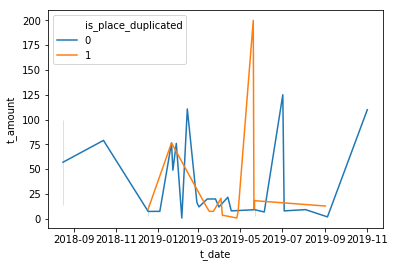

In [653]:
sns.lineplot(x="t_date",y="t_amount", data=data, hue="is_place_duplicated")

- A line plot that demonstrates the fluctuation of t_amount w.r.t t_date

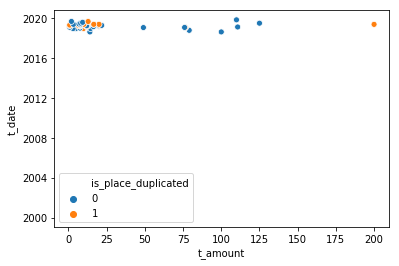

In [424]:
sns.scatterplot(x="t_amount",y="t_date", data=data,hue="is_place_duplicated" )

- a scatter plot that represents on what date I spent the most money on.

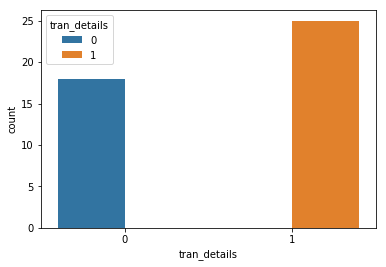

In [425]:
sns.countplot(x="tran_details",data=data, hue="tran_details")

- As you can see, 1 representing the expensive places has a greater frequency of occuring than 0.

- Getting individuals stats between expensive and not expensive places.

In [431]:
data.groupby("tran_details")["t_amount"].sum()

tran_details
0     101.55
1    1241.45
Name: t_amount, dtype: float64

- As you can see, the expensive area costs around $1241 and I spent a lot on these areas.

In [433]:
data.groupby("tran_details")["t_amount"].mean()

tran_details
0     5.641667
1    49.658000
Name: t_amount, dtype: float64

- As you can see, the expensive area mean costs around $49 and the average spending at an expensive area was about 50.

In [428]:
data.groupby("tran_details")["t_amount"].max()

tran_details
0      9.77
1    200.00
Name: t_amount, dtype: float64

- As you can see, the max area costs around $200.

In [435]:
data.head()

,t_date,tran_details,t_amount,is_place_duplicated
0,2018-08-16,1,100.00,0
1,2018-08-16,1,13.98,0
2,2018-10-14,1,79.00,0
3,2018-12-18,0,4.88,0
4,2018-12-18,0,9.77,1


## Date at which I spent the most?

In [461]:
data.t_date[data.t_amount == np.max(data.t_amount.values)]

29   2019-05-20
Name: t_date, dtype: datetime64[ns]

- The date at which I spent the most was: 2019-05-20.

## Date at which I spent the least?

In [460]:
data.t_date[data.t_amount == np.min(data.t_amount.values)]

12   2019-02-05
23   2019-04-05
27   2019-04-26
Name: t_date, dtype: datetime64[ns]

- There were three dates when I had the minimum amount of money.

## <u>Data Prepartion for prediction</u>

In [462]:
data.head()

,t_date,tran_details,t_amount,is_place_duplicated
0,2018-08-16,1,100.00,0
1,2018-08-16,1,13.98,0
2,2018-10-14,1,79.00,0
3,2018-12-18,0,4.88,0
4,2018-12-18,0,9.77,1


- Now let us move with making a predicting model.
- To achieve this, we first convert t_date into days and them encode them with a mapping.

In [498]:
"""
    convert()
    convert the date in to day.
"""
def convert(data):
    days = []
    for date in data["t_date"]:
        date = str(date).replace("00:00:00","")
        date = date.replace("-","/")
        days.append(convert_date_to_week(date))
    return days

# convert the column
data["t_date"] = convert(data)

- Now we have about 3 features.

- Now we have changed the dates to days, we now begin by mapping days to numbers.

In [504]:
# convert into mapping
data["t_date"] = data["t_date"].map(days)

In [505]:
data.head()

,t_date,tran_details,t_amount,is_place_duplicated
0,3,1,100.00,0
1,3,1,13.98,0
2,6,1,79.00,0
3,1,0,4.88,0
4,1,0,9.77,1


In [506]:
data.corr()

,t_date,t_amount,is_place_duplicated
t_date,1.000000,-0.248738,-0.020201
t_amount,-0.248738,1.000000,-0.067875
is_place_duplicated,-0.020201,-0.067875,1.000000


- We see a correlation between the features.

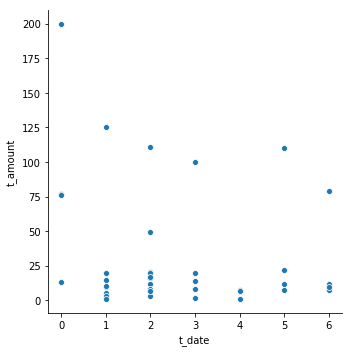

In [509]:
sns.relplot(x="t_date", y="t_amount",data=data)

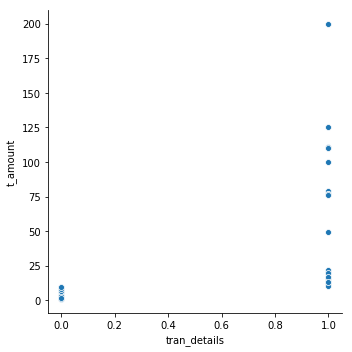

In [510]:
sns.relplot(x="tran_details", y="t_amount",data=data)

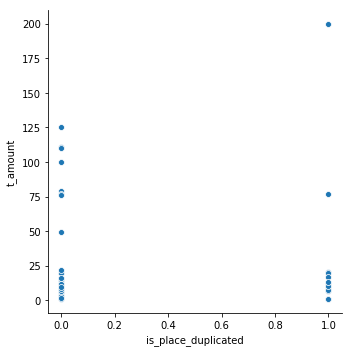

In [511]:
sns.relplot(x="is_place_duplicated", y="t_amount",data=data)

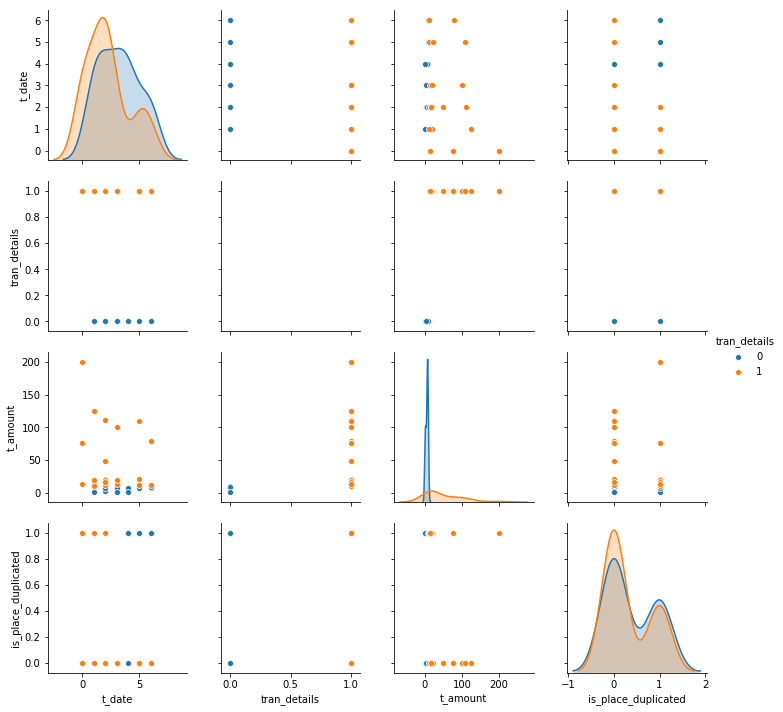

In [515]:
sns.pairplot(data,hue="tran_details")

## <u>Prediction</u>

In [517]:
features = data.drop("t_amount", axis=1).values
labels = data.t_amount.values

In [522]:
# splitting data
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, shuffle=True, random_state=42)

In [596]:
classifiers = {
    "linear regression": LinearRegression(),
    "svr": SVR(),
    "random forest":RandomForestRegressor(n_estimators=5),
    "Decision tree":DecisionTreeRegressor(),
    "BaggingRegressor":BaggingRegressor(),
    "Gradient Boosting":GradientBoostingRegressor(),
}

def train():
    for i, classifier in enumerate(classifiers):
        print ("Training with: ", i)
        classifiers.get(classifier).fit(features_train, labels_train)
        print("Training score: ", classifiers.get(classifier).score(features_train ,labels_train))
        print("Testing score: ", classifiers.get(classifier).score(features_test ,labels_test))
        print()

In [597]:
train()

Training with:  0
Training score:  0.2376959870500167
Testing score:  0.3981717628376832

Training with:  1
Training score:  -0.17361505860299298
Testing score:  -0.08759456430941825

Training with:  2
Training score:  0.38549543760370497
Testing score:  0.3294553182125629

Training with:  3
Training score:  0.4372731898394506
Testing score:  0.14911766044258212

Training with:  4
Training score:  0.38832419979790167
Testing score:  0.34273972101193007

Training with:  5
Training score:  0.4370434312071776
Testing score:  0.18207413623141863



/Users/aaditkapoor/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


- We get awful results with the these regressors as our data is limited.

## <u>Prediction Examples</u>

### What is the estimated spending on a Saturday at a unique and an expensive place?

In [614]:
demo = np.array([6, 1, 0])
print ("Estimated cost on a Saturday is: $",classifiers["random forest"].predict(demo.reshape(1,-1))[0])

Estimated cost on a Saturday is: $ 48.359


- 6 stands for Saturday
- 1 stands for expensive place
- 0 stands for unique place

## Conclusion
- We are able to successfully gather sufficient about my expenses.
- We see that my frequency of going to an expensive place (>10) was more than less expensive places.
- As you can see, the expensive area mean costs around 49 and the average spending at expensive area was about 50.
- As you can see, the expensive area costs around 1241 and I spent a lot on these areas.
- Our model's metric were not upto to the mark as there was limitation on the data.
- As we keep getting data, we will update our model.